Example fitting a RHESSI observation of an M flare from [Flecther et. 2007](https://doi.org/10.1086/510446), flare #3 M1.2 (old GOES/XRS scaling). This flare has attenuator (A1) in during the flare and pre-flare background time - which is unusual and so background selection/subtraction is more like a shutter out flare.

Here we are trying to simultenously fit the data from multiple detectors, the model scaled by factors to represent the systematic difference between detectors - here trying 6 detectors at once!

* files generated by [get_fl20021005_a1.pro](https://github.com/ianan/sks_examples/blob/main/get_fl20021005_a1.pro)
* sunkit-spex fit for the summed detectors [sks_fit_rhessi_flare.ipynb](https://github.com/ianan/sks_examples/blob/main/sks_fit_rhessi_flare.ipynb)
* Flare in the [RHESSI Image Archive](https://umbra.nascom.nasa.gov/rhessi/rhessi_extras/flare_images_v2/2002/10/05/20021005_1040_1056/hsi_20021005_1040_1056.html)
* Flare in the [RHESSI Browser](https://sprg.ssl.berkeley.edu/~tohban/browser/?show=grth1+qlpcr+qlpds+qlpg9+qlifs+qli01+qli02+qli03+qli04+qli05+qli06+qlids&date=20021005&time=104537&bar=1)



Mind that sunkit-spex currently can only work with RHESSI files made in sswidl that have sum_flag=1, even if the file only contains one detector https://github.com/sunpy/sunkit-spex/issues/132

* 27-Oct-2025   IGH
---

In [1]:
from astropy.time import Time, TimeDelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sunpy.io.special import read_genx

# Works with legacy code in sunkit-sepx version 0.4.1.dev52
from sunkit_spex.extern.rhessi import RhessiLoader
from sunkit_spex.legacy.fitting.fitter import Fitter

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

plt.rcParams.update({'font.size': 18,'mathtext.default':"regular"})

In [2]:
# Use the better fit models?
from sunkit_spex.legacy import thermal
ch_dir='../fvth_stuff/better_chxdb/'
# Or from https://github.com/ianan/fvth_stuff/tree/main/better_chxdb
thermal.LINE_GRID=thermal.setup_line_parameters(ch_dir+'chianti_lines_2_12_unity_v1102_t101.sav') 
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters(ch_dir+'chianti_cont_1_250_unity_v1102_t101.sav')

In [ ]:
# Some setup for sunxspex
time_profile_size = (9,6)
spec_single_plot_size = (6,8)
spec_plot_size = (16,10)
spec_font_size = 18
default_font_size = 10
xlims, ylims = [3,100], [5e-2,3e4]
tol = 1e-5

# Where are the spec and srm fits files
# Just try 2 to beging with....
_dir = "fits/"
specname1=_dir+"20021005_103800_spec_d1_sf1.fits"
srmname1=_dir+"20021005_103800_srm_d1_sf1.fits"
specname3=_dir+"20021005_103800_spec_d3_sf1.fits"
srmname3=_dir+"20021005_103800_srm_d3_sf1.fits"
specname4=_dir+"20021005_103800_spec_d4_sf1.fits"
srmname4=_dir+"20021005_103800_srm_d4_sf1.fits"
specname6=_dir+"20021005_103800_spec_d6_sf1.fits"
srmname6=_dir+"20021005_103800_srm_d6_sf1.fits"
specname8=_dir+"20021005_103800_spec_d8_sf1.fits"
srmname8=_dir+"20021005_103800_srm_d8_sf1.fits"
specname9=_dir+"20021005_103800_spec_d9_sf1.fits"
srmname9=_dir+"20021005_103800_srm_d9_sf1.fits"
tmk2kev=0.086164

In [5]:
# Flare peak and background times
ftims=Time(['2002-10-05T10:41:20.000','2002-10-05T10:42:24.000'],format='isot')
btims=Time(['2002-10-05T10:38:32.000','2002-10-05T10:40:32.000'],format='isot')
print(ftims)
print(btims)

['2002-10-05T10:41:20.000' '2002-10-05T10:42:24.000']
['2002-10-05T10:38:32.000' '2002-10-05T10:40:32.000']


In [6]:
spec1 = RhessiLoader(spectrum_fn=specname1, srm_fn=srmname1)
spec3 = RhessiLoader(spectrum_fn=specname3, srm_fn=srmname3)
spec4 = RhessiLoader(spectrum_fn=specname4, srm_fn=srmname4)
spec6 = RhessiLoader(spectrum_fn=specname6, srm_fn=srmname6)
spec8 = RhessiLoader(spectrum_fn=specname8, srm_fn=srmname8)
spec9 = RhessiLoader(spectrum_fn=specname9, srm_fn=srmname9)

In [7]:
spec1.update_background_times(btims[0],btims[1])
spec1.update_event_times(ftims[0],ftims[1])

spec3.update_background_times(btims[0],btims[1])
spec3.update_event_times(ftims[0],ftims[1])

spec4.update_background_times(btims[0],btims[1])
spec4.update_event_times(ftims[0],ftims[1])

spec6.update_background_times(btims[0],btims[1])
spec6.update_event_times(ftims[0],ftims[1])

spec8.update_background_times(btims[0],btims[1])
spec8.update_event_times(ftims[0],ftims[1])

spec9.update_background_times(btims[0],btims[1])
spec9.update_event_times(ftims[0],ftims[1])

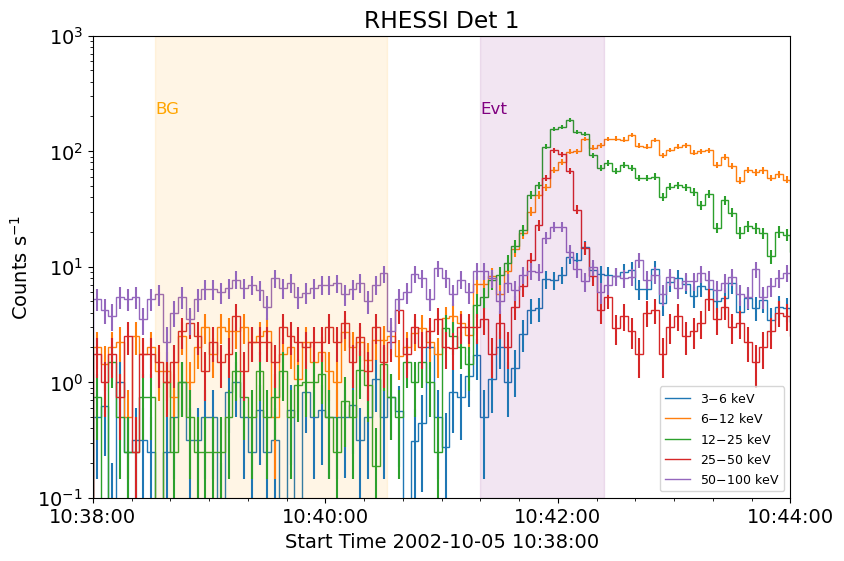

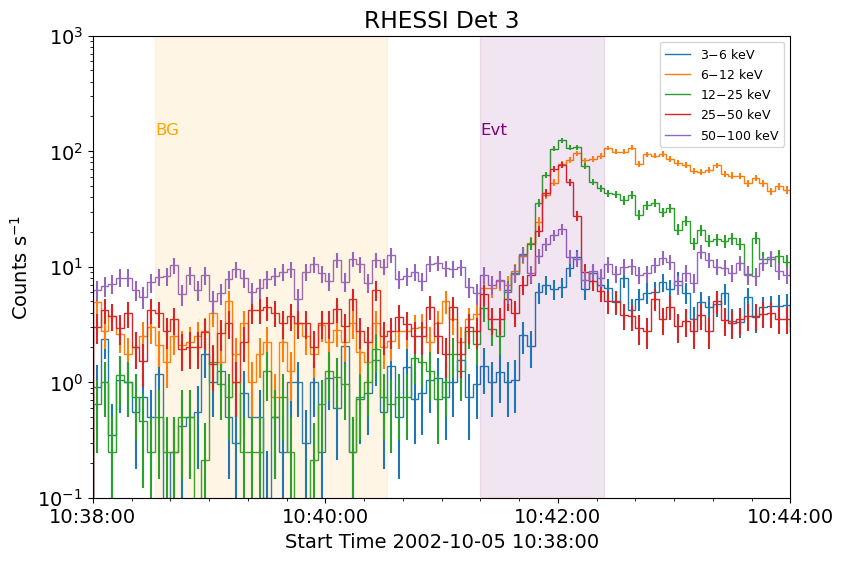

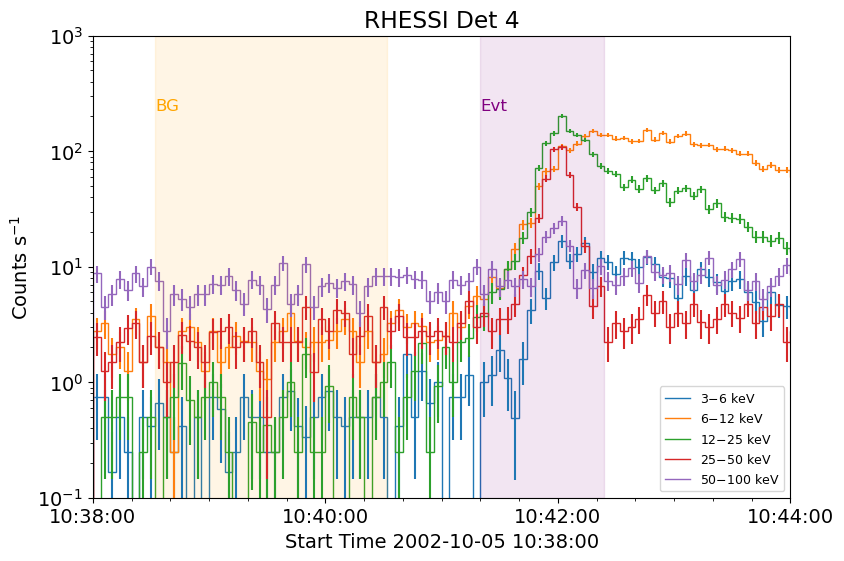

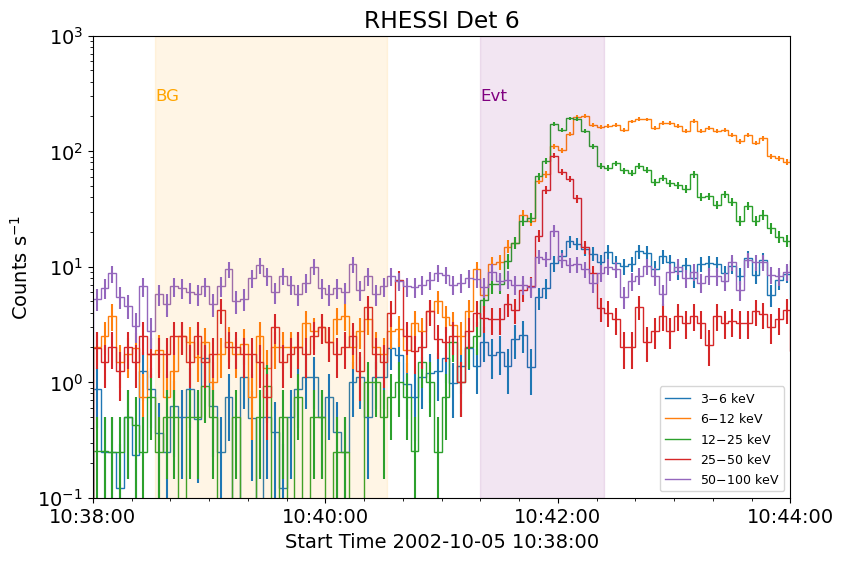

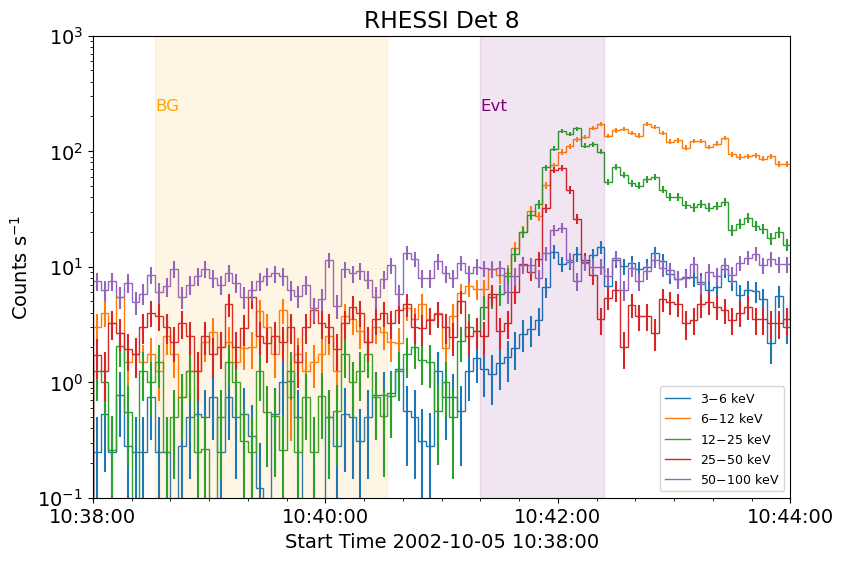

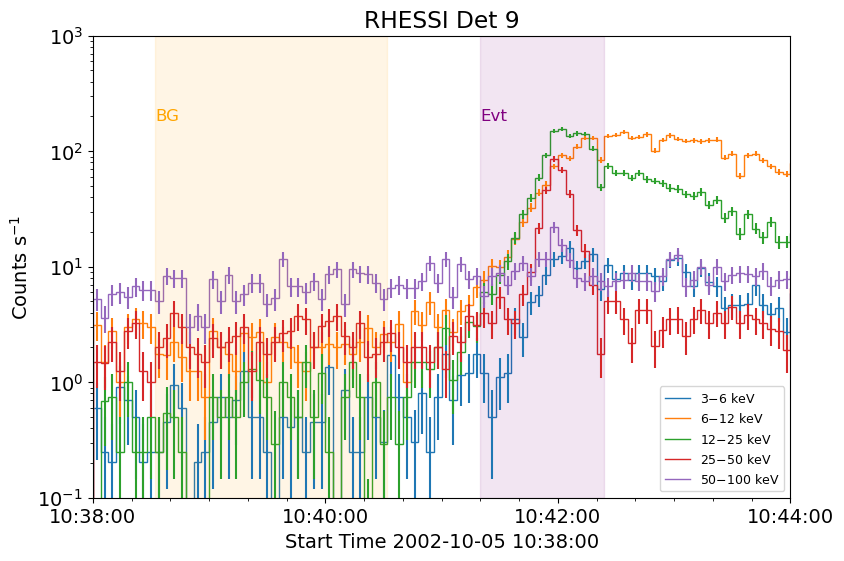

In [10]:
tr=Time(['2002-10-05T10:38:00.000','2002-10-05T10:44:00.000'],format='isot')
plt.rcParams['font.size'] = 14
plt.figure(figsize=time_profile_size)
ax=spec1.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 1")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()

plt.figure(figsize=time_profile_size)
ax=spec3.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 3")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()

plt.figure(figsize=time_profile_size)
ax=spec4.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 4")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()

plt.figure(figsize=time_profile_size)
ax=spec6.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 6")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()

plt.figure(figsize=time_profile_size)
ax=spec8.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 8")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()

plt.figure(figsize=time_profile_size)
ax=spec9.lightcurve(energy_ranges=[[3,6], [6,12], [12,25], [25,50],[50,100]])
ax.set_xlim(tr[0].datetime,tr[1].datetime)
ax.set_xlabel("Start Time "+tr[0].iso[:19])
ax.set_title("RHESSI Det 9")
ax.set_ylim(1e-1,1e3)
ax.xaxis.set_minor_locator(matplotlib.dates.SecondLocator(interval=20))
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.show()
plt.rcParams['font.size'] = default_font_size



In [11]:
#  Now do the fitting
fitter = Fitter(spec1,spec3,spec4,spec6,spec8,spec9)
fitter.model = "C*(f_vth+thick_fn)"
fitter.loglikelihood = "cstat"

# Make sure only the scaling parameters vary relative to the spectrum 1 (det1)
fitter.params["C_spectrum1"] = "frozen"
fitter.params["C_spectrum2"] = "free"
fitter.params["C_spectrum3"] = "free"
fitter.params["C_spectrum4"] = "free"
fitter.params["C_spectrum5"] = "free"
fitter.params["C_spectrum6"] = "free"

fitter.show_params

Param,Status,Value,Bounds,Error
,,,"(min, max)","(-, +)"
str22,str26,float64,object,object
T1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
total_eflux1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
index1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
e_c1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
C_spectrum1,frozen,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
T1_spectrum2,tie_T1_spectrum1,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum2,tie_EM1_spectrum1,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"


In [12]:
# Fit setup and ranges optimised for this flare
# As A1 only fit > 6keV
fitter.energy_fitting_range = [6,15]
fitter.params["T1_spectrum1"] = {"Value":22, "Bounds":(10, 30)}
fitter.params["EM1_spectrum1"] = {"Value":10, "Bounds":(1e-1, 1e3)}
fitter.params["total_eflux1_spectrum1"] = {"Status":"fix", "Value":0.1, "Bounds":(1e-3, 1e2)}
fitter.params["index1_spectrum1"] = {"Status":"fix", "Value":6, "Bounds":(2, 12)}
fitter.params["e_c1_spectrum1"] = {"Status":"fix", "Value":20, "Bounds":(5, 30)}
spec_fit = fitter.fit()

# Then non-thermal fit higher energy
fitter.energy_fitting_range = [15,45]
fitter.params["T1_spectrum1"] = "fix"
fitter.params["EM1_spectrum1"] = "fix"
fitter.params["total_eflux1_spectrum1"] = "free"
fitter.params["index1_spectrum1"] = "free"
fitter.params["e_c1_spectrum1"] = "free"
spec_fit = fitter.fit()

# The do the full range
fitter.energy_fitting_range = [6,45]
fitter.params["T1_spectrum1"] = "free"
fitter.params["EM1_spectrum1"] = "free"
fitter.params["total_eflux1_spectrum1"] = "free"
fitter.params["index1_spectrum1"] = "free"
fitter.params["e_c1_spectrum1"] = "free"
spec_fit = fitter.fit()

# fitter.show_params
# fitted parameters
print(spec_fit)

[22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 1.0, 22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 0.9903834316600144, 22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 1.1469595153220442, 22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 1.1944655576103007, 22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 1.1686823483027597, 22.654328174781494, 17.873240747842523, 0.8891646435841528, 5.661128179352849, 19.769396703690273, 1.2048695879395313]


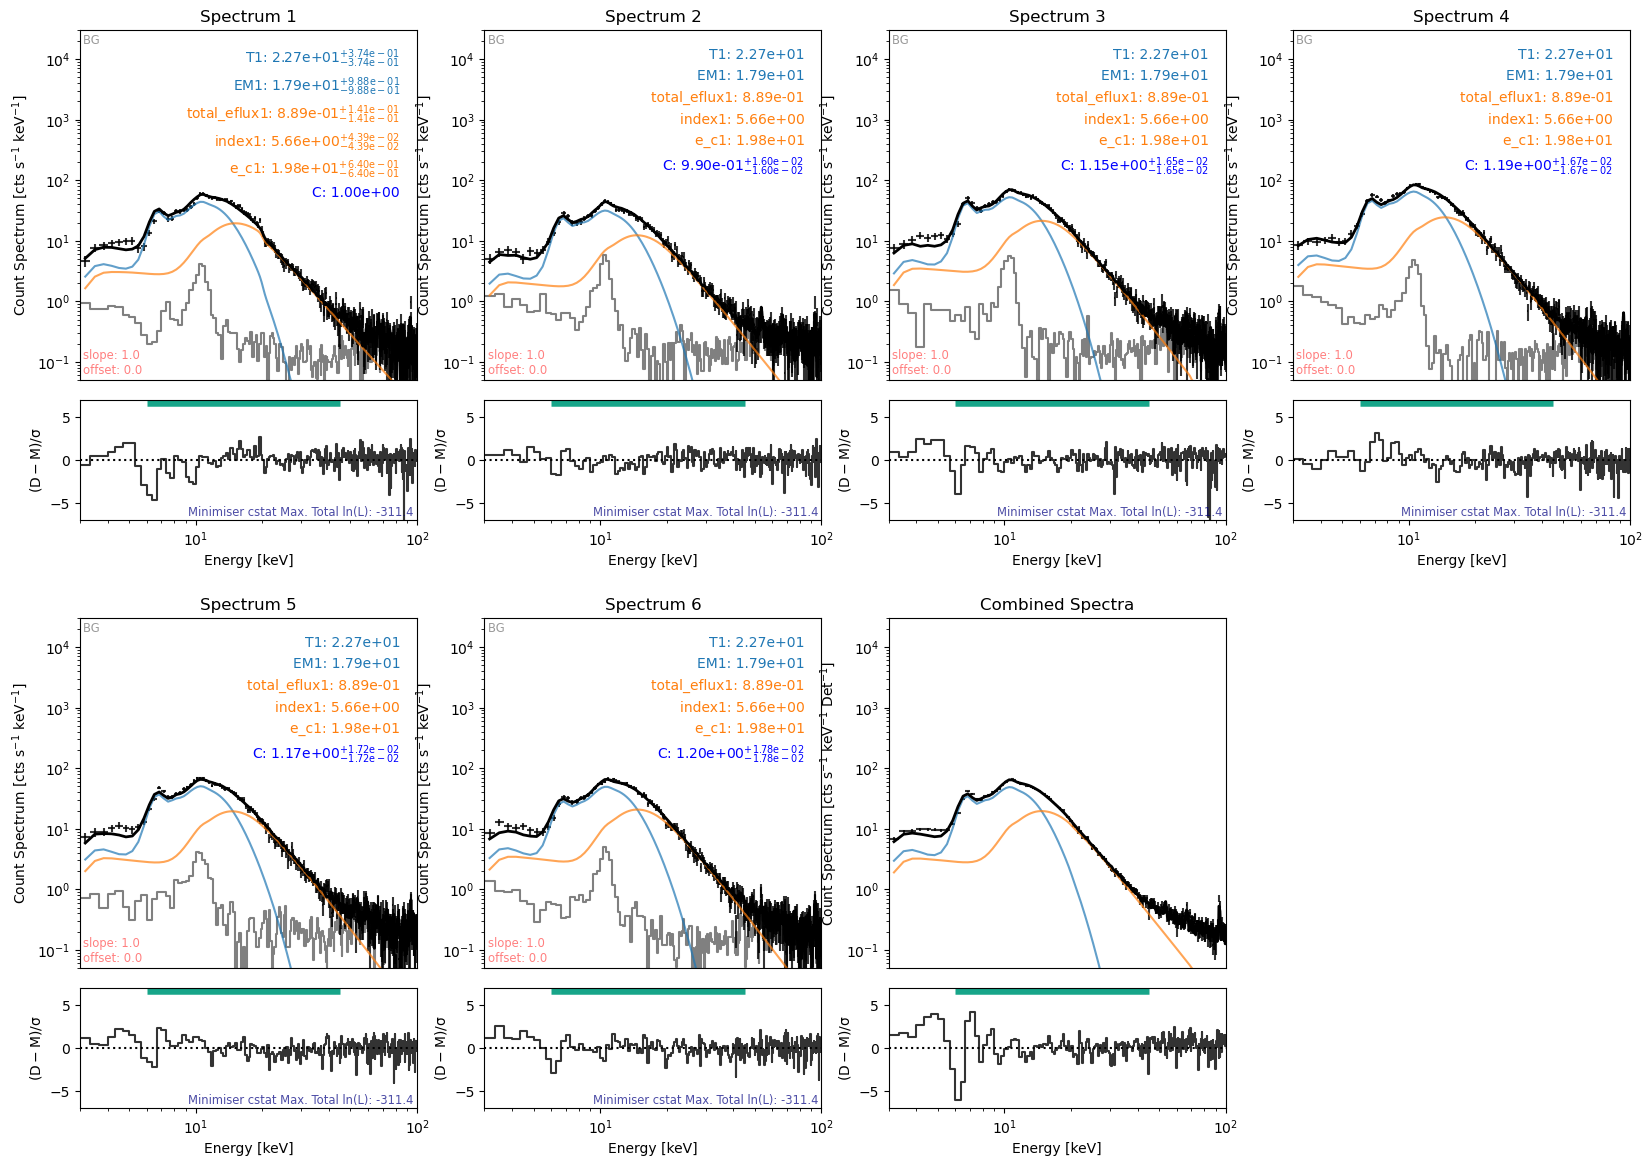

In [19]:
plt.figure(figsize=(20,14))
axes, res_axes = fitter.plot()
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.show()

In [ ]:
# Just go straight to the final plot as mcmc would be slow here
# But still worth running if had the time

In [20]:
# Get all the fit parameters
tmk=fitter.params["T1_spectrum1"]['Value']
tmk_ci=[tmk-fitter.params["T1_spectrum1"]['Error'][0],tmk+fitter.params["T1_spectrum1"]['Error'][1]]
em=fitter.params["EM1_spectrum1"]['Value']*1e46
em_ci=[em-fitter.params["EM1_spectrum1"]['Error'][0]*1e46,\
    em+fitter.params["EM1_spectrum1"]['Error'][1]*1e46]
ntot=fitter.params["total_eflux1_spectrum1"]["Value"]*1e35
ntot_err=[fitter.params["total_eflux1_spectrum1"]["Error"][0]*1e35,\
          fitter.params["total_eflux1_spectrum1"]["Error"][1]*1e35]
ind=fitter.params["index1_spectrum1"]["Value"]
ind_err=[fitter.params["index1_spectrum1"]["Error"][0],fitter.params["index1_spectrum1"]["Error"][1]]
ec=fitter.params["e_c1_spectrum1"]["Value"]
ec_err=[fitter.params["e_c1_spectrum1"]["Error"][0],fitter.params["e_c1_spectrum1"]["Error"][1]]
# Make them look nice for the plot
tmks=f'{tmk:4.2f}'
tmkups=f'{tmk_ci[1]-tmk:4.2f}'
tmkdns=f'{tmk-tmk_ci[0]:4.2f}'
ems=f'{em*1e-46:4.2f}'
emups=f'{(em_ci[1]-em)*1e-46:4.2f}'
emdns=f'{(em-em_ci[0])*1e-46:4.2f}'
nts=f'{ntot*1e-35:4.2f}'
ntups=f'{ntot_err[1]*1e-35:4.2f}'
ntdns=f'{ntot_err[0]*1e-35:4.2f}'
inds=f'{ind:4.2f}'
indups=f'{ind_err[1]:4.2f}'
inddns=f'{ind_err[0]:4.2f}'
ecs=f'{ec:4.2f}'
ecups=f'{ec_err[1]:4.2f}'
ecdns=f'{ec_err[0]:4.2f}'
# Calculate the power
nnpow=1.6e-9*ntot*ec*(ind-1)/(ind-2)
nnpows=f'{nnpow*1e-27:4.2f}'
# Get the log likelihood
lnl=fitter._get_max_fit_stat()
lnls=f'{lnl:.2f}'

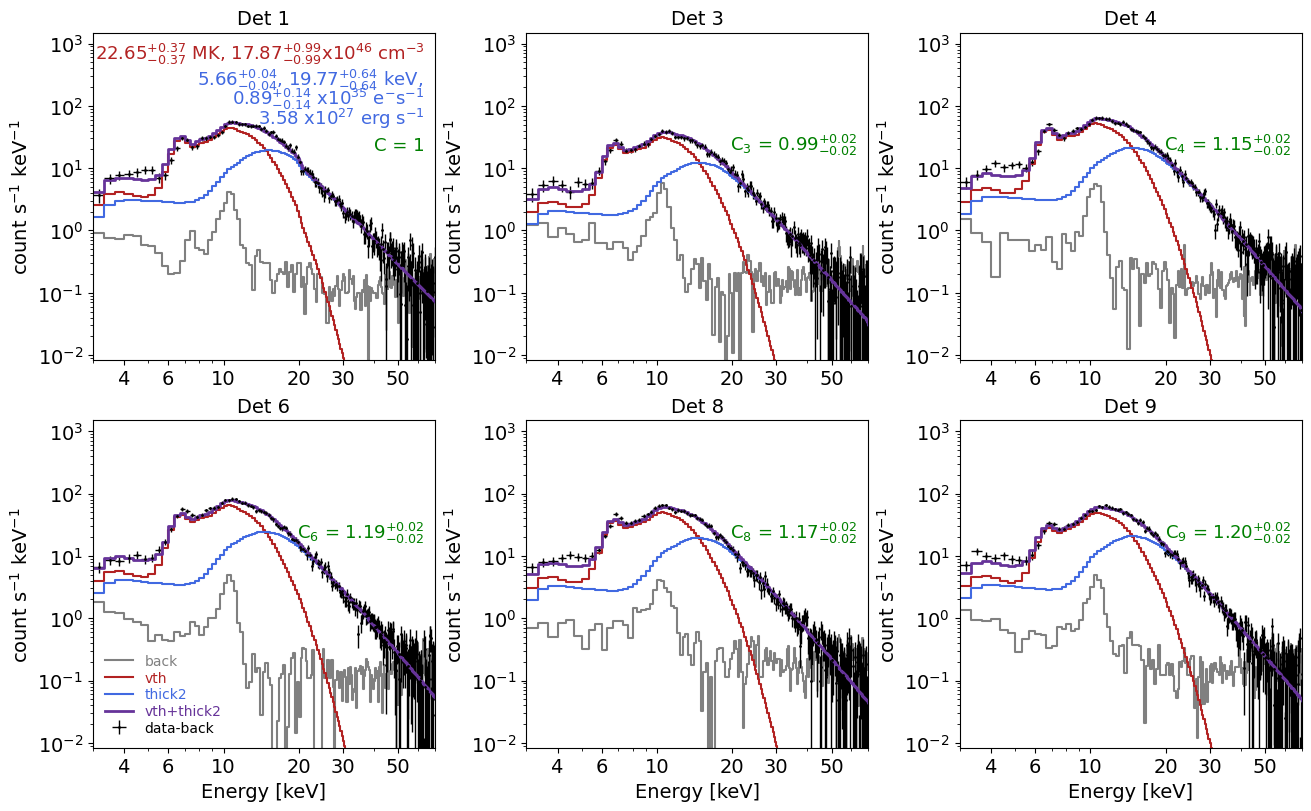

In [24]:
plt.rc('font', family='sans-serif', weight='normal', size=14)
fig, axes = plt.subplots(2, 3, figsize=(13, 8), constrained_layout=True)
# fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
clist = []
cuplist = []
cdnlist = []
frozendet=1
detlist = np.array([1,3,4,6,8,9])

ylims=np.array([5e-2,9e3])/6.
xlim=[3,70]
for s, ax in zip(range(len(detlist)), axes.flat):
    plt.subplots
    c=fitter.params["C_spectrum"+str(int(s+1))]["Value"]

    # Get the data and fits to replot
    engs=fitter.plotting_info['spectrum'+str(int(s+1))]['count_channels']
    edels=fitter.plotting_info['spectrum'+str(int(s+1))]['count_channel_error']
    rat=fitter.plotting_info['spectrum'+str(int(s+1))]['count_rates'] #background + flare
    erat=fitter.plotting_info['spectrum'+str(int(s+1))]['count_rate_errors']
    # Currently background returns same values twice ?!?!?! like resid
    backrat=fitter.plotting_info['spectrum'+str(int(s+1))]['background_rate'][::2]
    resid=fitter.plotting_info['spectrum'+str(int(s+1))]['residuals'][::2] 
    fmd=fitter.plotting_info['spectrum'+str(int(s+1))]['count_rate_model']
    sfmd=fitter.plotting_info['spectrum'+str(int(s+1))]['submodels'] #[0] is fvth, [1] is fthick2
    fiter=fitter.plotting_info['spectrum'+str(int(s+1))]['fitting_range']
    # Sort out the energy binning steps for plotting
    stepe = list()
    for i in range(len(engs)):
        stepe.append(engs[i] - edels[i])
    stepe.append(engs[-1]+edels[-1])
    ns=len(stepe)
    
    #gs_kw = dict(height_ratios=[4,1],hspace=0.02,wspace=0.05)
    plt.rcParams['font.size'] = 10
    #fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
    #                     gridspec_kw=gs_kw,figsize=spec_plot_size)

    ax.step(stepe[0:ns-1],backrat,where='post',color='grey',lw=1.5,label='back')
    ax.errorbar(engs,rat-backrat,xerr=edels,yerr=erat,fmt='.',color='k',lw=1.,ms=2,label='data-back')
    ax.step(stepe[0:ns-1],sfmd[0][0:ns-1],where='post',color='firebrick',label='vth')
    ax.step(stepe[0:ns-1],sfmd[1][0:ns-1],where='post',color='royalblue',label='thick2')
    ax.step(stepe[0:ns-1],fmd[0:ns-1]-backrat,where='post',color='rebeccapurple',lw=2,label='vth+thick2')    
    ax.set_ylabel('count s$^{-1}$ keV$^{-1}$')

    if not s==np.where(detlist==frozendet)[0][0]:
        c=f'{c:4.2f}'
        c_err=[fitter.params["C_spectrum"+str(int(s+1))]["Error"][0],fitter.params["C_spectrum"+str(int(s+1))]["Error"][1]]
        cups=f'{c_err[1]:4.2f}'
        cdns=f'{c_err[0]:4.2f}'
        dd=f'{detlist[s]}'
        ax.text(0.97,0.64,"C$_{"+dd+"}$ = "+c+'$^{+'+cups+'}_{-'+cdns+'}$',\
            color='g',ha='right',transform=ax.transAxes,size=13)
    else:
        ax.text(0.97,0.92,tmks+'$^{+'+tmkups+'}_{-'+tmkdns+'}$ MK, '+\
            ems+'$^{+'+emups+'}_{-'+emdns+'}$x10$^{46}$ cm$^{-3}$',\
            color='firebrick',ha='right',transform=ax.transAxes,size=13)

        ax.text(0.97,0.84,inds+'$^{+'+indups+'}_{-'+inddns+'}$, '+\
            ecs+'$^{+'+ecups+'}_{-'+ecdns+'}$ keV, ',
            color='royalblue',ha='right',transform=ax.transAxes,size=13)
        ax.text(0.97,0.78,nts+'$^{+'+ntups+'}_{-'+ntdns+'}$ x10$^{35}$ e$^{-}$s$^{-1}$',\
            color='royalblue',ha='right',transform=ax.transAxes,size=13)
        ax.text(0.97,0.72,nnpows+' x10$^{27}$ erg s$\mathit{^{-1}}$',\
              color='royalblue',ha='right',transform=ax.transAxes,size=13)
        c=1
        c_err=[0,0]
        ax.text(0.97,0.64,"C = 1",\
            color='g',ha='right',transform=ax.transAxes,size=13)
    if s > 2:
        ax.set_xlabel("Energy [keV]")
    if s ==3:
        ax.legend(loc=3,labelcolor='linecolor',labelspacing=0.2,frameon=False,prop={'size': 10})

    clist.append(float(c))
    cuplist.append(c_err[0])
    cdnlist.append(c_err[1])

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylim(ylims)
    ax.set_xlim(xlim)
    ax.set_xticks([4,6,10,20,30,50])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.set_title("Det " + str(detlist[s]),size=14)
plt.savefig('20030725_vth_thick2_ex_detsim.pdf',bbox_inches='tight')
plt.show()